In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
import math


from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score, mean_squared_error

from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')


import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("train.csv")

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## EDA

In [5]:
df.shape

(1460, 81)

In [6]:
## Convert three columns to 'object' type as mentioned above
df[['MSSubClass', 'OverallQual', 'OverallCond']] = df[['MSSubClass', 'OverallQual', 'OverallCond']].astype('object')


## Convert two columns to 'numeric' type as mentioned above
#df['LotFrontage'] = pd.to_numeric(df['LotFrontage'], errors='coerce')
#df['MasVnrArea'] = pd.to_numeric(df['MasVnrArea'], errors='coerce')

df.drop(['PoolQC','MiscFeature','Fence','Alley','FireplaceQu'], axis=1,inplace=True) 

##### Dropping columns with Maximum NAN values

In [7]:
df.drop(['Id'], axis=1,inplace=True) 
#Dropping ID column as it is only the id columns

In [8]:
#Columns with missing values
col=['LotFrontage','MasVnrArea','GarageYrBlt']
for i in col:
    df[i] = df[i].fillna(df[i].median()) 

In [9]:
col1=['MasVnrType','BsmtQual','BsmtCond','BsmtFinType1','BsmtFinType2','GarageType','GarageFinish','GarageQual','GarageCond']
df['MasVnrType'] = df['MasVnrType'].fillna("None")
df['BsmtQual'] = df['BsmtQual'].fillna("None")
df['BsmtCond'] = df['BsmtCond'].fillna("None")
df['BsmtFinType1'] = df['BsmtFinType1'].fillna("None")
df['BsmtFinType2'] = df['BsmtFinType2'].fillna("None")
df['GarageType'] = df['GarageType'].fillna("None")
df['GarageFinish'] = df['GarageFinish'].fillna("None")
df['GarageQual'] = df['GarageQual'].fillna("None")
df['GarageCond'] = df['GarageCond'].fillna("None")
df['Electrical']=df['Electrical'].fillna("None")
df['BsmtExposure']=df['BsmtExposure'].fillna('None')

df['PoolQC']=df['PoolQC'].fillna('None')
df['MiscFeature']=df['MiscFeature'].fillna('None')
df['Fence']=df['Fence'].fillna('None')
df['Alley']=df['Alley'].fillna('None')
df['FireplaceQu']=df['FireplaceQu'].fillna('None')

In [10]:
print(list(df.isna().sum()))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   object 
 17  OverallCond    1460 non-null   object 
 18  YearBuil

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.shape #seems no redundunct data

(1460, 80)

### Outliers Check

<Axes: >

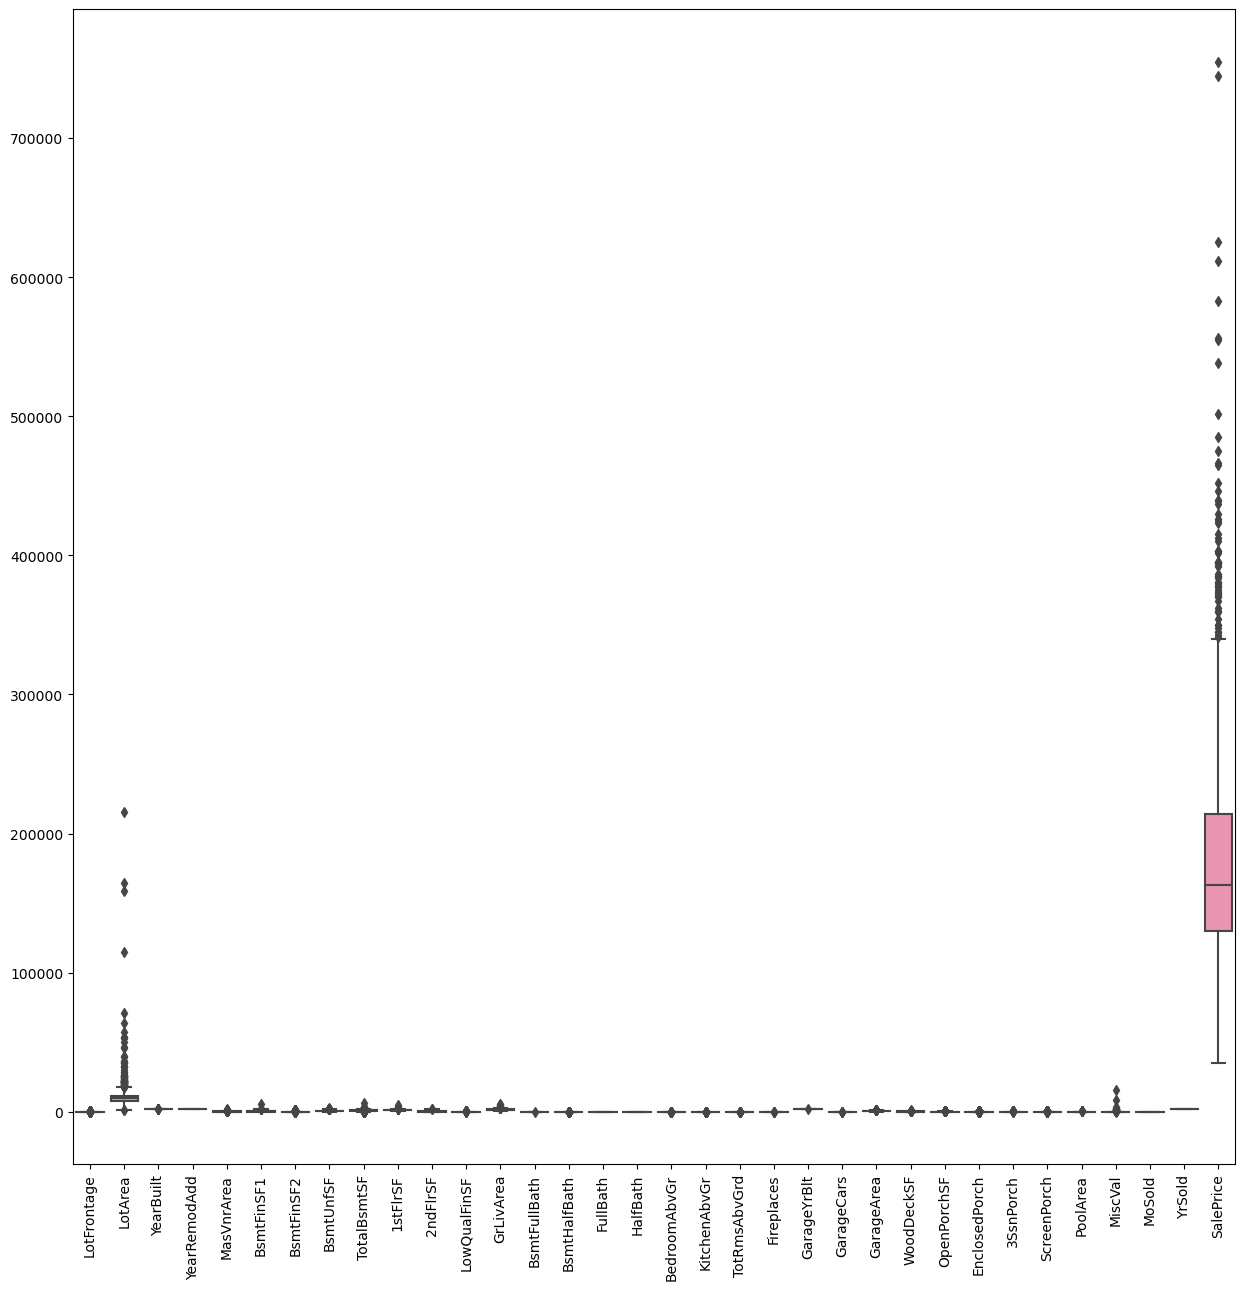

In [14]:
## Check the boxplots to view outliers in numerical columns
df_num = df.select_dtypes(include=['int64', 'float64'])
df_cat = df.select_dtypes(include='object')

df_cat_encoded = pd.get_dummies(df_cat, drop_first=True)

plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.boxplot(data=df_num)

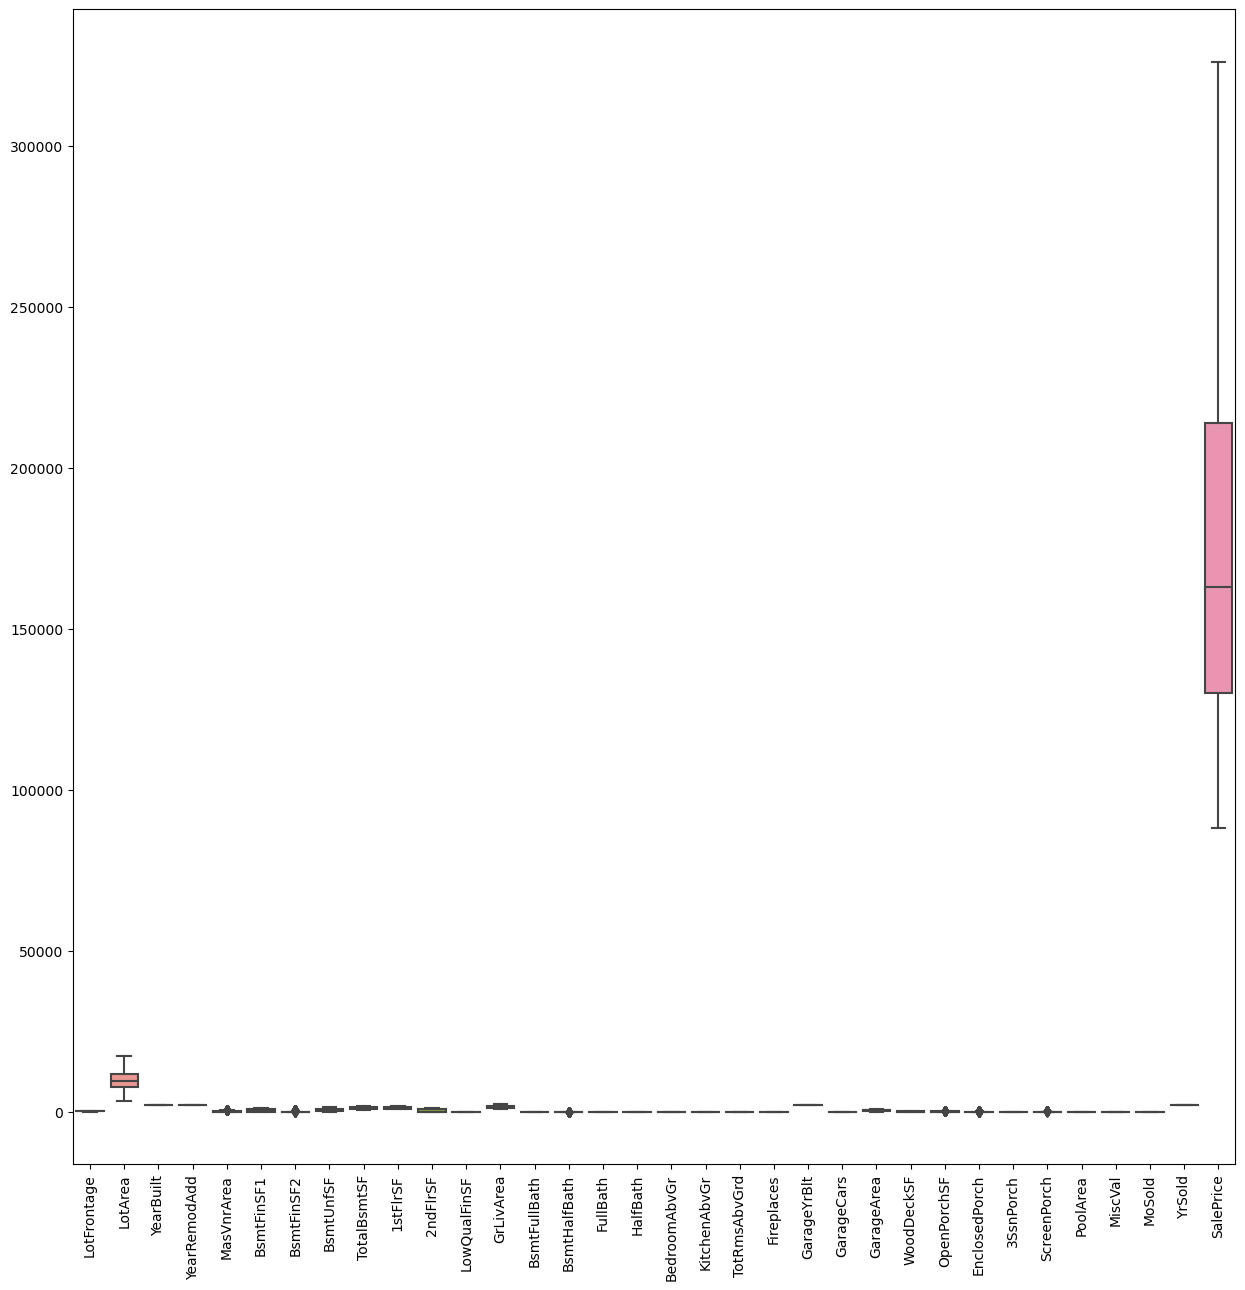

In [15]:
## Capping outliers to 5% at lower bound and 95% at upper bound
for col in df_num.columns:
    df_num[col][df_num[col] <= df_num[col].quantile(0.05)] = df_num[col].quantile(0.05)
    df_num[col][df_num[col] >= df_num[col].quantile(0.95)] = df_num[col].quantile(0.95)
    
plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.boxplot(data=df_num);


In [16]:
df = pd.concat([df_num, df_cat_encoded], axis=1)
df.head()
print(list(df.columns))

['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45', 'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_80', 'MSSubClass_85', 'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Pave', 'Alley_None', 'Alley_Pave', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'Utilities_NoSeWa', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotC

In [17]:
df_cat_encoded = pd.get_dummies(df_cat, drop_first=True)
df_cat_encoded.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [18]:
df.describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,69.112568,9682.319212,1971.787671,1984.794521,92.047945,431.089041,32.931233,556.537671,1055.950616,1151.861370,...,0.003425,0.003425,0.083562,0.002055,0.867808,0.002740,0.008219,0.013699,0.820548,0.085616
std,16.509008,3469.967624,28.872129,20.565620,140.590668,412.214952,100.569218,414.582219,346.901853,333.684061,...,0.058440,0.058440,0.276824,0.045299,0.338815,0.052289,0.090317,0.116277,0.383862,0.279893
min,35.950000,3311.700000,1916.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,519.300000,672.950000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.000000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,69.000000,9478.500000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,79.000000,11601.500000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,104.000000,17401.150000,2007.000000,2007.000000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# figure size
plt.figure(figsize=(16,8))
# heatmap
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

#Getting Numerical columns

num_var=['SalePrice','MSSubClass','LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd']
df_num=df[num_var]
sns.pairplot(df_num)
plt.show()

num_var1=['SalePrice', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF']
        
df_num=df[num_var1]
sns.pairplot(df_num)
plt.show()

num_var1=['SalePrice', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath']
        
df_num=df[num_var1]
sns.pairplot(df_num)
plt.show()

num_var1=['SalePrice','BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr']
        
df_num=df[num_var1]
sns.pairplot(df_num)
plt.show()

num_var1=['SalePrice','TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea']
        
df_num=df[num_var1]
sns.pairplot(df_num)
plt.show()

num_var1=['SalePrice', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold']
        
df_num=df[num_var1]
sns.pairplot(df_num)
plt.show()

<h3><font color="red"> Since some Independent variables are positively correlated with SalesPrice -
We should go ahead with Linear Correlation <br /><br /><br /> <font color="green"> 
Assumption 1 passed since some Linear Relationship is observed between Independent and Target Variable  </h3>

### box plots for Catergorical variables

print(df['BldgType'].value_counts())

plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.boxplot(x="BldgType",y="SalePrice",data=df)

plt.figure(figsize=(10,8))
plt.subplot(2,3,1)
sns.boxplot(x="BsmtCond",y="SalePrice",data=df)

plt.figure(figsize=(10,8))
plt.subplot(2,3,1)
sns.boxplot(x="BsmtFinType1",y="SalePrice",data=df)

plt.figure(figsize=(10,8))
plt.subplot(2,3,1)
sns.boxplot(x="BsmtFinType2",y="SalePrice",data=df)

plt.figure(figsize=(10,8))
plt.subplot(2,3,1)
sns.boxplot(x="BsmtQual",y="SalePrice",data=df)

plt.figure(figsize=(10,8))
plt.subplot(2,3,1)
sns.boxplot(x="CentralAir",y="SalePrice",data=df)

plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
sns.boxplot(x="Condition1",y="SalePrice",data=df)

plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
sns.boxplot(x="Condition2",y="SalePrice",data=df)

plt.figure(figsize=(10,8))
plt.subplot(2,3,1)
sns.boxplot(x="Electrical",y="SalePrice",data=df)

plt.figure(figsize=(10,8))
plt.subplot(2,3,1)
sns.boxplot(x="ExterCond",y="SalePrice",data=df)

plt.figure(figsize=(10,8))
plt.subplot(2,3,1)
sns.boxplot(x="ExterQual",y="SalePrice",data=df)

plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
sns.boxplot(x="Exterior1st",y="SalePrice",data=df)

plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
sns.boxplot(x="Exterior2nd",y="SalePrice",data=df)

plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
sns.boxplot(x="Foundation",y="SalePrice",data=df)

plt.figure(figsize=(10,8))
plt.subplot(2,3,1)
sns.boxplot(x="Functional",y="SalePrice",data=df)

plt.figure(figsize=(10,8))
plt.subplot(2,3,1)
sns.boxplot(x="GarageCond",y="SalePrice",data=df)

plt.figure(figsize=(10,8))
plt.subplot(2,3,1)
sns.boxplot(x="GarageFinish",y="SalePrice",data=df)

plt.figure(figsize=(10,8))
plt.subplot(2,3,1)
sns.boxplot(x="GarageQual",y="SalePrice",data=df)

plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
sns.boxplot(x="GarageType",y="SalePrice",data=df)

plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
sns.boxplot(x="Heating",y="SalePrice",data=df)

plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.boxplot(x="LandContour",y="SalePrice",data=df)

plt.figure(figsize=(10,8))
plt.subplot(2,3,1)
sns.boxplot(x="HeatingQC",y="SalePrice",data=df)

plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
sns.boxplot(x="HouseStyle",y="SalePrice",data=df)

plt.figure(figsize=(10,8))
plt.subplot(2,3,1)
sns.boxplot(x="KitchenQual",y="SalePrice",data=df)

plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
sns.boxplot(x="LotConfig",y="SalePrice",data=df)

plt.figure(figsize=(10,8))
plt.subplot(2,3,1)
sns.boxplot(x="LandSlope",y="SalePrice",data=df)

plt.figure(figsize=(10,8))
plt.subplot(2,3,1)
sns.boxplot(x="LotShape",y="SalePrice",data=df)

plt.figure(figsize=(10,8))
plt.subplot(2,3,1)
sns.boxplot(x="MSZoning",y="SalePrice",data=df)

plt.figure(figsize=(10,8))
plt.subplot(2,3,1)
sns.boxplot(x="MasVnrType",y="SalePrice",data=df)

plt.figure(figsize=(10,8))
plt.subplot(2,1,2)
plt.xticks(rotation=90)
sns.boxplot(x="Neighborhood",y="SalePrice",data=df)

plt.figure(figsize=(10,8))
plt.subplot(2,3,1)
sns.boxplot(x="PavedDrive",y="SalePrice",data=df)

plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
sns.boxplot(x="RoofMatl",y="SalePrice",data=df)

plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
sns.boxplot(x="RoofStyle",y="SalePrice",data=df)

plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.boxplot(x="SaleCondition",y="SalePrice",data=df)

plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
plt.xticks(rotation=90)
sns.boxplot(x="SaleType",y="SalePrice",data=df)

plt.figure(figsize=(10,8))
plt.subplot(2,3,1)
sns.boxplot(x="Street",y="SalePrice",data=df)

plt.figure(figsize=(10,8))
plt.subplot(2,3,1)
sns.boxplot(x="Utilities",y="SalePrice",data=df)

### Data Preparation

In [19]:
X=df.drop(['SalePrice'], axis=1)
y = df['SalePrice'] # response variable in Y

In [20]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [21]:
# scaling the features - necessary before using Ridge or Lasso
#from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
#cols = X.columns
#X = pd.DataFrame(scale(X))
#X.columns = cols
#X.columns



## Create a list of numerical columns to be scaled
num_cols = list(X_train.select_dtypes(include=['int64', 'float64']).columns)
num_cols

from sklearn.preprocessing import StandardScaler

## Create a scaling instance
scaler = StandardScaler()

## Scale the numerical columns 
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

### Model Building and Evaluation

In [22]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [23]:
# Print the coefficients and intercept
#print(lm.intercept_)
#print(lm.coef_)

In [24]:
# Predictions on the basis of the model
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)


### Checking the overall sense of the error in the model

In [25]:
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)



mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)

residual=y_train-y_pred_train

0.9616189708538534
-2.605518773039296e+19
164799006376.18744
161409408.79156458


#### Residual Analysis

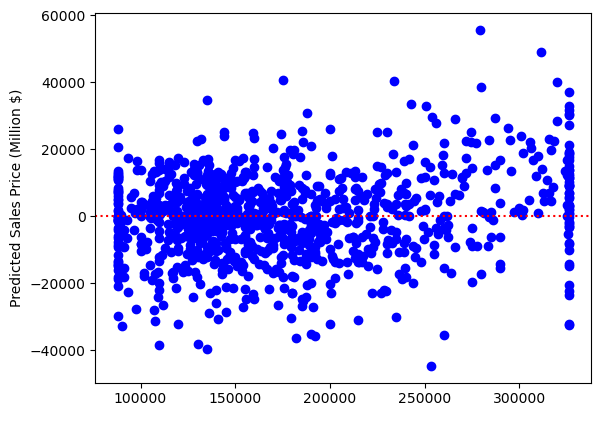

In [26]:
# Plot for Predicted sales vs Marketing Spend
plt.scatter( y_train ,residual  , color = 'blue') # original data shown as blue points
plt.axhline(y=0,color='r',linestyle=":")
plt.xlabel(" ")
plt.ylabel("Predicted Sales Price (Million $)")
plt.show()

# Observation => 1. We note that these residuals are not randomly spread around the Zero line, It shows a pattern.
#                2. It does not fit in the horizontal band

#### Normality of Error Terms/Residual

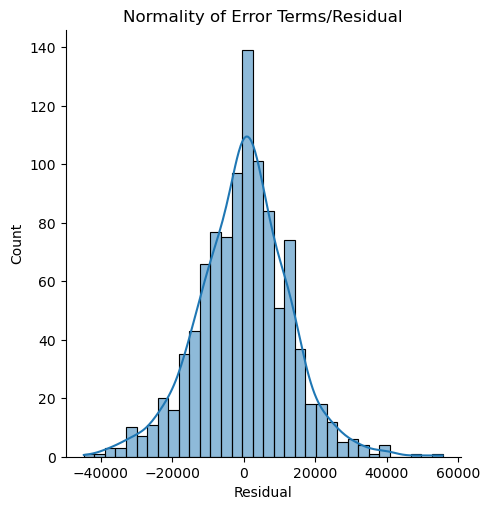

In [27]:
p=sns.displot(residual,kde=True)
p=plt.title('Normality of Error Terms/Residual')
plt.xlabel("Residual")
plt.show()

# Observation => There is significant right skew. The assumption of Normality of residuals is also not met 
#                Essentially the Model which we hae created so far is not suitable for making the predictions
#                So we realized that there  is a shape that is not linearly related to the response columns in order to make linearly
##                related we have to go ahead and transform the data

<Axes: xlabel='SalePrice', ylabel='Density'>

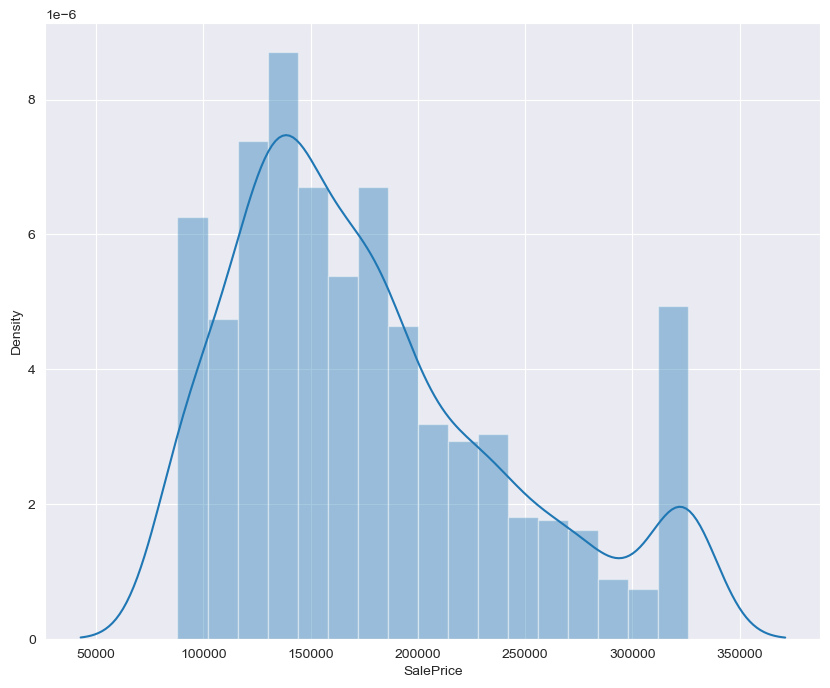

In [28]:
#In the above plot we see there is right skewness-
#The problem is non-normality of error-term or unequal variance then we should think of transforming
# response variable which is Sales price.

# let's analyse the target variable 'SalePrice'
plt.figure(figsize=[10,8])
sns.set_style('darkgrid')
sns.distplot(df['SalePrice'])

In [29]:
df['SalePrice'].skew()

0.8093608815268364

In [30]:
df['SalePrice'].kurt()

-0.13486401678734516

In [31]:
## Log transform the target variable
## We are using log function for tranformation because we see the Residual plot the shape of residual plot is of log function.
## hence performing log transformation
df['SalePrice'] = np.log(df['SalePrice'])

#### Rebuild the model

In [32]:
X=df.drop(['SalePrice'], axis=1)
y = df['SalePrice'] # response variable in Y

In [33]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [34]:
num_cols = list(X_train.select_dtypes(include=['int64', 'float64']).columns)
num_cols

from sklearn.preprocessing import StandardScaler

## Create a scaling instance
scaler = StandardScaler()

## Scale the numerical columns 
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [35]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [36]:
# Predictions on the basis of the model
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)


In [37]:
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 train data:- ",r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 test data:- ",r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)


mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)

residual=y_train-y_pred_train


R2 train data:-  0.9627941875054283
R2 test data:-  -6.502600960405404e+19
4.741339420886533
0.004643819217322755


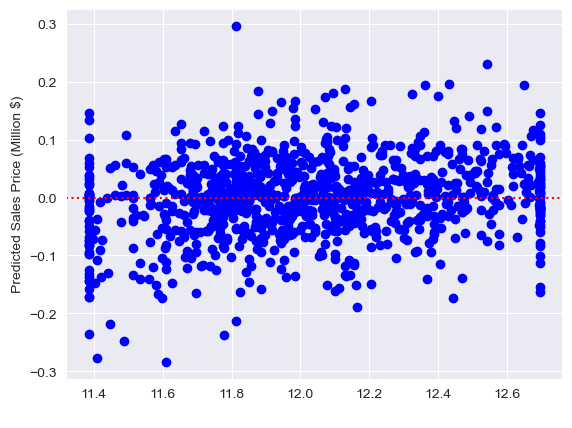

In [38]:
# Plot for Predicted sales vs Marketing Spend
plt.scatter( y_train ,residual  , color = 'blue') # original data shown as blue points
plt.axhline(y=0,color='r',linestyle=":")
plt.xlabel(" ")
plt.ylabel("Predicted Sales Price (Million $)")
plt.show()

# Observation => 1. We note that these residuals are not randomly spread around the Zero line, It shows a pattern.
#                2. It does not fit in the horizontal band

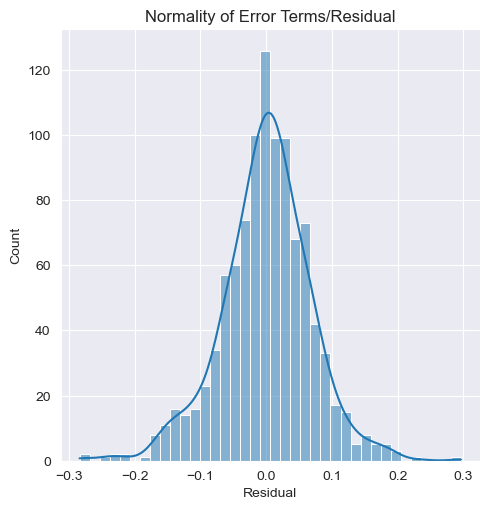

In [39]:
p=sns.displot(residual,kde=True)
p=plt.title('Normality of Error Terms/Residual')
plt.xlabel("Residual")
plt.show()

# Observation => There is significant right skew. The assumption of Normality of residuals is also not met 
#                Essentially the Model which we hae created so far is not suitable for making the predictions
#                So we realized that there  is a shape that is not linearly related to the response columns in order to make linearly
#                related we have to go ahead and transform the data

##### Even after Log transformation the model is not performing wel on Test data hence Ridge Model

In [40]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [41]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 7.0}


In [42]:
#Fitting Ridge model for alpha = 10.0 and printing coefficients which have been penalised
alpha = 7.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 5.44733459e-03  2.42296450e-02  5.36420951e-02  2.84842871e-02
 -1.58127309e-03  5.52091766e-03 -1.77716082e-03 -1.69448532e-02
  6.31740852e-02  1.10345995e-03  2.91202775e-02  0.00000000e+00
  9.40326301e-02  8.72812358e-03 -1.25485548e-03  1.13483443e-02
  9.50715807e-03  5.46799624e-04  0.00000000e+00 -2.90029632e-03
  8.22862982e-03 -1.19088380e-03  6.55224486e-03  2.61029978e-02
  1.08340447e-02  5.73672115e-03  1.77080411e-03  0.00000000e+00
  4.71911352e-03  0.00000000e+00  0.00000000e+00  1.23837634e-03
 -1.93069055e-03 -3.64923049e-02 -1.14241452e-02  1.32321242e-03
  2.56196489e-03 -1.78799139e-02  4.84599373e-02  3.16293150e-02
 -4.44317785e-03  1.24688040e-02 -3.39567466e-02  7.81377342e-03
 -4.72108792e-02 -3.24937769e-02 -2.60300869e-02  4.28970405e-02
  2.97192072e-02  2.44406522e-02 -1.27213313e-02 -5.94544558e-03
 -2.70582407e-03  1.82804254e-02  1.08043777e-03 -1.79297777e-02
  3.60911382e-03  1.49276430e-02  1.58024197e-02  2.31617973e-02
 -1.23152297e-02  2.77099

In [43]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_ridge_pred_train = ridge.predict(X_train)
y_ridge_pred_test = ridge.predict(X_test)



metric2 = []
r2_train_lr = r2_score(y_train, y_ridge_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_ridge_pred_test)
print(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_ridge_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

mse_train_lr = mean_squared_error(y_train, y_ridge_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)


0.9498291437529667
0.8968364954241739
6.393545592866621
0.0062620426962454664


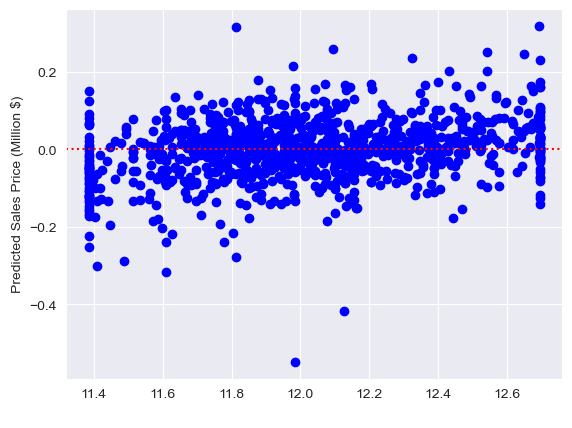

In [44]:
residual_ridge=y_train-y_ridge_pred_train
# Plot for Predicted sales vs Marketing Spend
plt.scatter( y_train ,residual_ridge  , color = 'blue') # original data shown as blue points
plt.axhline(y=0,color='r',linestyle=":")
plt.xlabel(" ")
plt.ylabel("Predicted Sales Price (Million $)")
plt.show()

# Observation => 1. We note that these residuals are  randomly spread around the Zero line, There is no  pattern.
#                2. It fit in the horizontal band

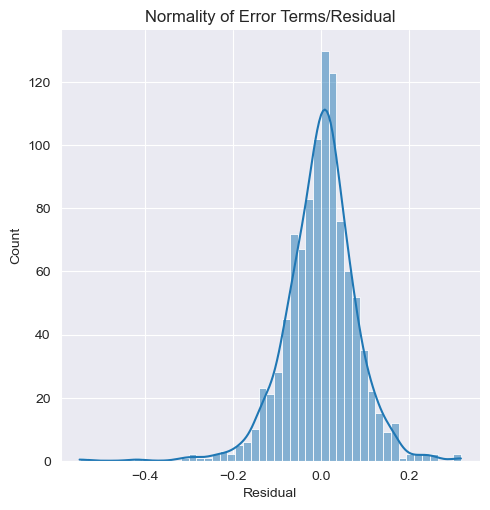

In [45]:
p=sns.displot(residual_ridge,kde=True)
p=plt.title('Normality of Error Terms/Residual')
plt.xlabel("Residual")
plt.show()

### Lasso

In [46]:
lasso = Lasso()

# cross validation
model_cv1 = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv1.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [47]:
# Printing the best hyperparameter alpha
print(model_cv1.best_params_)

{'alpha': 0.0001}


In [48]:
#Fitting Ridge model for alpha = 0.001 and printing coefficients which have been penalised

#alpha =0.001
alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [49]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_lasso_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)
y_lasso_pred_test = lasso.predict(X_test)


metric3 = []
r2_train_lr = r2_score(y_train, y_lasso_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_train_lr = r2_score(y_test, y_lasso_pred_test)
print(r2_train_lr)


rss1_lr = np.sum(np.square(y_train - y_lasso_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)



mse_train_lr = mean_squared_error(y_train, y_lasso_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)



0.9588187678698946
0.8513303415347877
5.247948807128871
0.005140008625983223


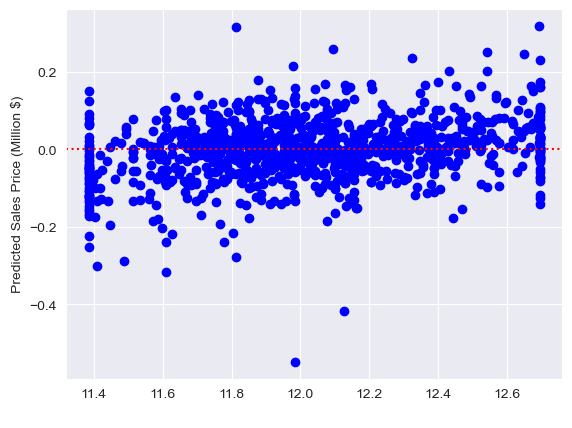

In [50]:
residual_lasso=y_train-y_ridge_pred_train
# Plot for Predicted sales vs Marketing Spend
plt.scatter( y_train ,residual_lasso  , color = 'blue') # original data shown as blue points
plt.axhline(y=0,color='r',linestyle=":")
plt.xlabel(" ")
plt.ylabel("Predicted Sales Price (Million $)")
plt.show()

# Observation => 1. We note that these residuals are randomly spread around the Zero line, It does not shows a pattern.
#                2. It does fit in the horizontal band

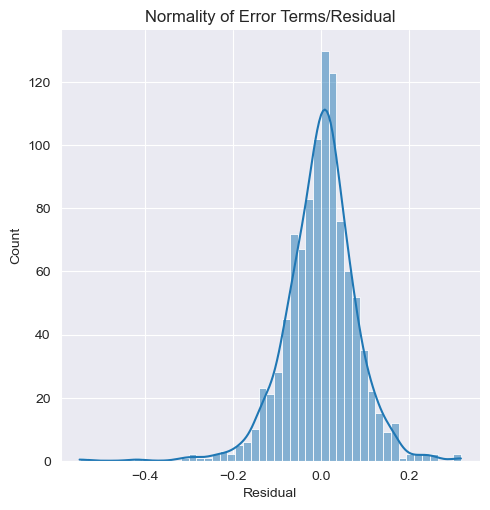

In [51]:
p=sns.displot(residual_lasso,kde=True)
p=plt.title('Normality of Error Terms/Residual')
plt.xlabel("Residual")
plt.show()

In [52]:
#Making inferences

In [54]:
## First create empty datafame with all the independent variables as indices
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
## Now fill in the values of betas, one column for ridge coefficients and one for lasso coefficients
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

betas.loc[betas['Lasso']!=0, 'Lasso']
## View the top 10 coefficients of Ridge regression in descending order
betas['Ridge'].sort_values(ascending=False)[:11]

OverallQual_9           0.097121
GrLivArea               0.094033
OverallCond_9           0.091140
Neighborhood_Crawfor    0.085247
OverallQual_8           0.082220
TotalBsmtSF             0.063174
Functional_Typ          0.062507
Exterior1st_BrkFace     0.057281
Neighborhood_Somerst    0.054056
YearBuilt               0.053642
Neighborhood_StoneBr    0.051559
Name: Ridge, dtype: float64

### Inferences

Which variables are significant in predicting the price of a house?



Answer=> OverallQual_9           
         GrLivArea              
         OverallCond_9           
         Neighborhood_Crawfor    
         OverallQual_8         
         TotalBsmtSF             
         Functional_Typ          
         Exterior1st_BrkFace     
         Neighborhood_Somerst    
         YearBuilt               
         Neighborhood_StoneBr

In [59]:
ridge_coeffs = np.exp(betas['Ridge'])
ridge_coeffs.sort_values(ascending=False)[:11]

OverallQual_9           1.101994
GrLivArea               1.098596
OverallCond_9           1.095423
Neighborhood_Crawfor    1.088986
OverallQual_8           1.085694
TotalBsmtSF             1.065212
Functional_Typ          1.064502
Exterior1st_BrkFace     1.058954
Neighborhood_Somerst    1.055543
YearBuilt               1.055107
Neighborhood_StoneBr    1.052911
Name: Ridge, dtype: float64

Question=> How well those variables describe the price of a house?

#### Answer =>

OverallQual_9 => If the overall material and finish of the house is excellent then the price will by 1.10 times

GrLivArea => If the height increase by per square feet the price will increase by 1.09 times

OverallCond_9 => if the overall condiftion of the house is excellent the price will increase by 1.09 times

Neighborhood_Crawfor => if the neighbourhood is nearby Neighborhood_Crawfor the price will increase by 1.08 times

OverallQual_8 => If the overall material and finish of the house is very good then the price will by 1.085 times        

TotalBsmtSF => If the Total square feet of basement area increases the price will also increase by 1.06 times

Functional_Typ =>If the functional type is typical then the price will increase by 1.06 times

Exterior1st_BrkFace => If the  Exterior covering on house is Brick face then the price will increase by 1.05 times

Neighborhood_StoneBr and Neighborhood_Somers => If the negihbourhood is Neighborhood_Somerst and Neighborhood_StoneBr price will increase by 1.05

#### Question =>  determine the optimal value of lambda for ridge and lasso regression